# Assignment 4: Airline arrivals project

# TABLE OF CONTENTS

# I. Introduction

# II. Contents:

## 1. Preparing and exploring the data

### 1.1 Import librabries and handle missing value

1.1.1 Check out some basic information of data

1.1.2 Check missing value

### 1.2 Exploratory Data Analysis (EDA) 

1.2.1 Handle high correlatied feature

1.2.2 Handle outlier and visualize correlation of categorical feature

## 2. Hypothesis testing

## I. Introduction:

Use this dataset of airline arrival information to predict how late flights will be.
Apply studied methods to training model.

There is 29 features in file 2008.csv

1   Year                2008

2   Month               1-12

3   DayofMonth          1-31

4   DayOfWeek           1 (Monday) - 7 (Sunday)

5   DepTime             actual departure time (local, hhmm)

6   CRSDepTime          scheduled departure time (local, hhmm)

7   ArrTime             actual arrival time (local, hhmm)

8   CRSArrTime          scheduled arrival time (local, hhmm)

9   UniqueCarrier       unique carrier code

10  FlightNum           flight number

11  TailNum             plane tail number

12  ActualElapsedTime   in minutes

13  CRSElapsedTime      in minutes

14  AirTime             in minutes

15  ArrDelay            arrival delay, in minutes

16  DepDelay            departure delay, in minutes

17  Origin              origin IATA airport code

18  Dest                destination IATA airport code

19  Distance            in miles

20  TaxiIn              taxi in time, in minutes

21  TaxiOut             taxi out time in minutes

22  Cancelled           was the flight cancelled?

23  CancellationCode    reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24  Diverted            1 = yes, 0 = no

25  CarrierDelay        in minutes

26  WeatherDelay        in minutes

27  NASDelay            in minutes

28  SecurityDelay       in minutes

29  LateAircraftDelay   in minutes

There is 9 features in file plan-data.csv:

1 TailNum

2 type

3 manufacturer

4 issue_date

5 model

6 status

7 aircraft_type

8 engine_type

9 year

## II. Contents:

## 1. Preparing and exploring the data

### 1.1 Import librabries and handle missing value

Add necessary library. Read file '2008.csv' and file 'plan-data.csv'. We are merge two file 

In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
num_lines = 7009728  #number of records in file
sample_lines = 1000000 #desired sample size

random.seed(9001)
skip = random.sample(range(1, num_lines), num_lines - sample_lines)

In [3]:
data2008 = pd.read_csv('2008.csv', skiprows=skip)
plan = pd.read_csv('plane-data.csv')
original = pd.merge(data2008, plan)

#### 1.1.1 Check out some basic information of data

In [4]:
original.shape

(322539, 37)

In [5]:
original.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
1,2008,1,3,4,1720.0,1710,1944.0,1955,WN,3841,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
2,2008,1,3,4,1021.0,1025,1106.0,1115,WN,3754,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
3,2008,1,5,6,727.0,730,910.0,905,WN,912,...,NaN,NaN,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4,2008,1,5,6,2131.0,2020,2334.0,2240,WN,444,...,0.0,54.0,Corporation,BOEING,06/26/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007


In [6]:
original.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

After merge two file 2008.csv and plan-data.csv, the us data have 322539 observations and 37 features

#### 1.1.2 Check missing value

In [7]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322539 entries, 0 to 322538
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               322539 non-null  int64  
 1   Month              322539 non-null  int64  
 2   DayofMonth         322539 non-null  int64  
 3   DayOfWeek          322539 non-null  int64  
 4   DepTime            319368 non-null  float64
 5   CRSDepTime         322539 non-null  int64  
 6   ArrTime            318610 non-null  float64
 7   CRSArrTime         322539 non-null  int64  
 8   UniqueCarrier      322539 non-null  object 
 9   FlightNum          322539 non-null  int64  
 10  TailNum            322539 non-null  object 
 11  ActualElapsedTime  318610 non-null  float64
 12  CRSElapsedTime     322539 non-null  float64
 13  AirTime            318610 non-null  float64
 14  ArrDelay           318610 non-null  float64
 15  DepDelay           319368 non-null  float64
 16  Or

There are 14 features type float, 10 features type int, 13 features type object

In [8]:
types = original.dtypes.to_frame().rename(columns={0:'dtypes'})
null = original.isnull().sum().to_frame().rename(columns={0:'missing values'})
null_percent = (original.isnull().sum()/original.shape[0]*100).to_frame().rename(columns={0:'% missing values'})
df_missing = pd.concat([types, null, null_percent], axis=1)
df_missing

,dtypes,missing values,% missing values
Year,int64,0,0.000000
Month,int64,0,0.000000
DayofMonth,int64,0,0.000000
DayOfWeek,int64,0,0.000000
DepTime,float64,3171,0.983137
CRSDepTime,int64,0,0.000000
ArrTime,float64,3929,1.218147
CRSArrTime,int64,0,0.000000
UniqueCarrier,object,0,0.000000
FlightNum,int64,0,0.000000


There are 6 feature missing sample bigger than 60 percent.

In [9]:
missing_big = df_missing[df_missing['% missing values'] > 60]
missing_big

,dtypes,missing values,% missing values
CancellationCode,object,319368,99.016863
CarrierDelay,float64,242202,75.092314
WeatherDelay,float64,242202,75.092314
NASDelay,float64,242202,75.092314
SecurityDelay,float64,242202,75.092314
LateAircraftDelay,float64,242202,75.092314


 Remove this features

In [10]:
original.drop(columns = missing_big.index, inplace = True)
df = original.drop_duplicates()

In [11]:
missing = (original.isnull().sum()/original.shape[0]*100).to_frame().rename(columns={0:'% missing values'})
types = original.dtypes.to_frame().rename(columns={0:'dtypes'})
pd.concat([missing, types], axis = 1)

,% missing values,dtypes
Year,0.000000,int64
Month,0.000000,int64
DayofMonth,0.000000,int64
DayOfWeek,0.000000,int64
DepTime,0.983137,float64
CRSDepTime,0.000000,int64
ArrTime,1.218147,float64
CRSArrTime,0.000000,int64
UniqueCarrier,0.000000,object
FlightNum,0.000000,int64


In [12]:
original.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,322539.0,322539.000000,322539.000000,322539.000000,319368.000000,322539.000000,318610.000000,322539.000000,322539.000000,318610.000000,322539.000000,318610.000000,318610.000000,319368.000000,322539.000000,318610.000000,319368.000000,322539.000000,322539.000000
mean,2008.0,2.507328,15.706070,3.919514,1338.662800,1328.226146,1484.730310,1494.658187,2117.953444,129.913013,130.757998,106.544418,10.225865,11.346187,739.572244,6.773883,16.601090,0.009831,0.002350
std,0.0,1.123457,8.747393,1.983022,481.381978,467.149100,509.429504,486.404921,1912.837291,71.107350,70.509207,68.423429,38.943628,35.785011,564.601656,4.750738,10.983357,0.098665,0.048421
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,-90.000000,-79.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000,8.000000,2.000000,929.000000,925.000000,1108.000000,1115.000000,577.000000,78.000000,80.000000,57.000000,-9.000000,-4.000000,328.000000,4.000000,10.000000,0.000000,0.000000
50%,2008.0,3.000000,16.000000,4.000000,1329.000000,1320.000000,1515.000000,1517.000000,1476.000000,112.000000,113.000000,88.000000,0.000000,0.000000,590.000000,6.000000,14.000000,0.000000,0.000000
75%,2008.0,4.000000,23.000000,6.000000,1734.000000,1720.000000,1914.000000,1910.000000,3351.000000,162.000000,162.000000,137.000000,15.000000,11.000000,983.000000,8.000000,19.000000,0.000000,0.000000
max,2008.0,4.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,7829.000000,686.000000,660.000000,658.000000,1211.000000,1198.000000,4962.000000,175.000000,379.000000,1.000000,1.000000


Based on the describe, replace missing value by mean value of corresponding feature. Drop missing value of data which belongs to the type object.

In [13]:
original['ArrDelay'].fillna(original['ArrDelay'].mean(), inplace = True)
original['TaxiOut'].fillna(original['TaxiOut'].mean(), inplace = True)
original['TaxiIn'].fillna(original['TaxiIn'].mean(), inplace = True)
original['DepDelay'].fillna(original['DepDelay'].mean(), inplace = True)
original['ArrDelay'].fillna(original['ArrDelay'].mean(), inplace = True)
original['AirTime'].fillna(original['AirTime'].mean(), inplace = True)
original['CRSElapsedTime'].fillna(original['CRSElapsedTime'].mean(),inplace = True)
original['ActualElapsedTime'].fillna(original['ActualElapsedTime'].mean(), inplace = True)

DataNew = original.dropna()

In [14]:
DataNew.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
type                 0
manufacturer         0
issue_date           0
model                0
status               0
aircraft_type        0
engine_type          0
year                 0
dtype: int64

The DataNew is not missing value

In [15]:
DataNew.nunique()

Year                    1
Month                   4
DayofMonth             31
DayOfWeek               7
DepTime              1355
CRSDepTime           1134
ArrTime              1433
CRSArrTime           1295
UniqueCarrier          19
FlightNum            7105
TailNum              4427
ActualElapsedTime     589
CRSElapsedTime        446
AirTime               570
ArrDelay              572
DepDelay              525
Origin                281
Dest                  281
Distance             1295
TaxiIn                101
TaxiOut               198
Cancelled               1
Diverted                1
type                    5
manufacturer           37
issue_date           2387
model                 164
status                  2
aircraft_type           4
engine_type             7
year                   51
dtype: int64

The features 'Year', 'Cancelled', 'Diverted' is only 1 unique value, which will be little affect for training.
The features FlightNum TailNum is many value unique, which will be little affect fot training. 

In [16]:
DataNew = DataNew.drop(columns = ['Year', 'Cancelled', 'Diverted', 'FlightNum', 'TailNum', 'issue_date'])

In [17]:
DataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303231 entries, 0 to 322538
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              303231 non-null  int64  
 1   DayofMonth         303231 non-null  int64  
 2   DayOfWeek          303231 non-null  int64  
 3   DepTime            303231 non-null  float64
 4   CRSDepTime         303231 non-null  int64  
 5   ArrTime            303231 non-null  float64
 6   CRSArrTime         303231 non-null  int64  
 7   UniqueCarrier      303231 non-null  object 
 8   ActualElapsedTime  303231 non-null  float64
 9   CRSElapsedTime     303231 non-null  float64
 10  AirTime            303231 non-null  float64
 11  ArrDelay           303231 non-null  float64
 12  DepDelay           303231 non-null  float64
 13  Origin             303231 non-null  object 
 14  Dest               303231 non-null  object 
 15  Distance           303231 non-null  int64  
 16  Ta

##### Visualization data numeric

<AxesSubplot:title={'center':'Normal'}, xlabel='ArrDelay', ylabel='Count'>

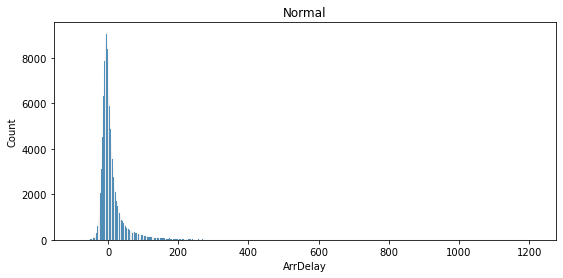

In [18]:
f, ax1 = plt.subplots(1, 1)
f.set_figwidth(9, forward=True)
ax1.set_title('Normal')
sns.histplot(DataNew['ArrDelay'], ax=ax1)

The ArrDelay value is flow the normal distribution

In [19]:
DataNew.ArrDelay = DataNew.ArrDelay.apply(lambda x: 1 if x > 30 else 0)
DataNew.ArrDelay.value_counts()

0    259205
1     44026
Name: ArrDelay, dtype: int64

AttributeError: 'PolyCollection' object has no property 'axis'

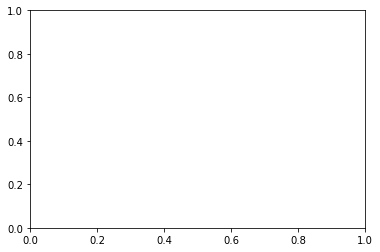

In [20]:
sns.histplot(DataNew['ArrDelay'], axis = 1)

The feature ArrDelay is imbalance

In [ ]:
quantitative = [f for f in DataNew.columns if DataNew.dtypes[f] != 'object']
quantitative.remove('ArrDelay')

In [ ]:
f = pd.melt(DataNew, value_vars = quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.histplot, 'value')

The feature whose normal distribution is DepTime, CRSDepTime, ArrTime, CRSArrTime, Distance, CRSElapsedTime

In [ ]:
yes_delay = DataNew[DataNew.ArrDelay == 1]
no_delay = DataNew[DataNew.ArrDelay == 0]

In [ ]:
plt.figure(num=1, figsize=(10,9))

plt.subplot(221)

x1 = yes_delay.Month.value_counts().sort_index().index
y1 = yes_delay.Month.value_counts().sort_index()/yes_delay.shape[0]*100
x2 = no_delay.Month.value_counts().sort_index().index
y2 = no_delay.Month.value_counts().sort_index()/no_delay.shape[0]*100
plt.title('% in ArrDelay: Yes (delay) and no (not delay)')
plt.xlabel('Month')
plt.ylabel('%')
plt.xticks(range(1,13))
plt.plot(x1,y1, '.-', label='1', color='r')
plt.plot(x2,y2, '.-', label='0', color='b')
plt.legend()

plt.subplot(222)
x3 = yes_delay.DayOfWeek.value_counts().sort_index().index
y3 = yes_delay.DayOfWeek.value_counts().sort_index()/yes_delay.shape[0]*100
x4 = no_delay.DayOfWeek.value_counts().sort_index().index
y4 = no_delay.DayOfWeek.value_counts().sort_index()/no_delay.shape[0]*100
plt.title('% in ArrDelay: Yes (delay) and no (not delay)')
plt.xlabel('DayOfWeek')
plt.ylabel('%')
plt.xticks(range(1,8))
plt.plot(x3,y3, '.-', label='1', color='r')
plt.plot(x4,y4, '.-', label='0', color='b')
plt.legend()

plt.subplot(223)
x5 = yes_delay.DayofMonth.value_counts().sort_index().index
y5 = yes_delay.DayofMonth.value_counts().sort_index()/yes_delay.shape[0]*100
x6 = no_delay.DayofMonth.value_counts().sort_index().index
y6 = no_delay.DayofMonth.value_counts().sort_index()/no_delay.shape[0]*100
plt.title('% in ArrDelay: Yes (delay) and no (not delay)')
plt.xlabel('DayofMonth')
plt.ylabel('%')
plt.xticks(range(1,32,5))
plt.plot(x5,y5, '.-', label='1', color='r')
plt.plot(x6,y6, '.-', label='0', color='b')
plt.legend()

plt.show()

The graph shows the ratio between delayed and non-delayed flights

In [ ]:
# f = pd.melt(DataNew, id_vars=['ArrDelay'], value_vars=quantitative)
# grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
# grid = grid.map(plt.scatter, 'value','ArrDelay')

In [ ]:
corelation = DataNew.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True, cmap = 'summer')

We see features highly correlated up to over 95%. We will remove this features

Because the problem is to predict whether the flight will be late or not, so we will delete the features before flying we don't have 

In [ ]:
DataNew = DataNew.drop(columns = ['DepTime', 'CRSDepTime','ActualElapsedTime', 'AirTime', 'DepDelay', 
                        'CRSElapsedTime'], axis = 1)

In [ ]:
corelation = DataNew.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True, cmap = 'summer')

#### visualization data categorical

In [ ]:
g = sns.countplot(data=DataNew, x='type')

Based on the graph, The feature 'type' is need to remove

In [ ]:
g1 = sns.countplot(data=DataNew, x='status')

Based on the graph, The feature 'status' is need to remove

In [ ]:
g2 = sns.countplot(data = DataNew, x = 'aircraft_type')

Based on the graph, The feature 'aircraft_type' is need to remove

In [ ]:
g3 = sns.countplot(data = DataNew, x = 'engine_type')

Based on the graph, The feature 'engine_type' is need to remove

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data= DataNew, x = 'manufacturer')

Based on the graph, The feature 'manufacturer' can be used in training

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data= DataNew, x = 'model')

Based on the graph, The feature 'manufacturer' can be used in training

In [ ]:
g4 = sns.countplot(data = DataNew, x = 'UniqueCarrier')

In [ ]:
g5 = sns.countplot(data = DataNew, x = 'Origin')

Based on the graph, The feature 'Origin' can be used in training

In [ ]:
g6 = sns.countplot(data = DataNew, x ='Dest')

Based on the graph, The feature 'Dest' can be used in training

In [ ]:
g7 = sns.countplot(data = DataNew, x ='year')

Based on the graph, The feature 'year' can be used in training

In [ ]:
DataNew = DataNew.drop(columns = ['type', 'status', 'aircraft_type'])

In [ ]:
DataNew.info()

#### Apply LabelEncoder

In [ ]:
DataNew1 = DataNew.copy()

In [ ]:
# apply LabelEncoder for categorical feature
le = LabelEncoder()
DataNew1['year'] = le.fit_transform(DataNew.year).reshape(-1,1)
DataNew1['Origin'] = le.fit_transform(DataNew.Origin).reshape(-1,1)
DataNew1['Dest'] = le.fit_transform(DataNew.Dest).reshape(-1,1)
DataNew1['engine_type'] = le.fit_transform(DataNew.engine_type).reshape(-1,1)
DataNew1['model'] = le.fit_transform(DataNew.model).reshape(-1,1)
DataNew1['manufacturer'] = le.fit_transform(DataNew.manufacturer).reshape(-1,1)
DataNew1['UniqueCarrier'] = le.fit_transform(DataNew.UniqueCarrier).reshape(-1,1)

In [ ]:
DataNew1.head()

In [ ]:
le_data = DataNew1.copy()
y = DataNew1['ArrDelay']
X = le_data.drop(columns = ['ArrDelay'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Apply Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_prednb = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,recall_score,classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve

In [ ]:
print(classification_report(y_test, y_prednb))

#### Logictic Regresion

In [ ]:
onehot = pd.get_dummies(DataNew, columns = ['year', 'Origin' ,'Dest', 'engine_type', 'model',
                                            'manufacturer', 'UniqueCarrier'], drop_first = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(onehot)

In [ ]:
X1 = onehot.drop('ArrDelay', axis = 1)
y1 = onehot['ArrDelay']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)
X_train.shape

In [ ]:
model = LogisticRegression(C = 1)
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)

In [ ]:
print(classification_report(y_test1, y_pred1))

#### Decision tree

In [ ]:
detree = DecisionTreeClassifier(criterion='entropy')
detree.fit(X_train, y_train)
y_predt = detree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predt))

#### Random Forest Classifier

In [ ]:
random =  RandomForestClassifier()
random.fit(X_train, y_train)
y_predran = random.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predran))

### Apply GridSearchCV on each model

#### Apply GridSearchCV on each model

In [ ]:
original.shape[0]